# Creating $X^{01}(\pi/2)$ gate for two-level system
- System: ibm_lagos
- dt = 0.2222222222222 ns
- steps = 144
- $\Omega_{d,0}$ = 455254858,0158402 Hz
- g = 0.07 GHz

In [1]:
import os
import sys

index = sys.path.index('')
sys.path.pop(index)
path = sys.path[0]
parent_dir = os.path.abspath(os.path.join(path, os.pardir))

for root, dirs, files in os.walk(parent_dir):
    for dir in dirs:
        sys.path.append(os.path.join(root, dir))

sys.path.append(parent_dir)
sys.path.pop(0)
print(sys.path)

['/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '/home/khoi-nguyen/qutrit_qoc/.venv/lib/python3.11/site-packages', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/output', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/quantum_optimal_control', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/experiments', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/refs', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/info', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/hooks', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/branches', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/objects', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/logs', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/refs/tags', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/refs/remotes', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/refs/heads', '/home/khoi-nguyen/qutrit_qoc/GRAPE-for-qubit/.git/refs/rem

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import inspect

from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape

data_path = '../output/x01_90/'

2023-10-05 08:34:05.317291: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 08:34:05.598587: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 08:34:05.598662: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 08:34:05.600414: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-05 08:34:05.752351: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 08:34:05.754725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account('030e0f3b6562aeef01f326920c2b5c95160de76135f801f67cce23704c77a274aa5241b45c7777d8a2bcfb4c71803c8796f4d6896241914aba81fc7281bae508', overwrite=True)

provider = IBMProvider()
backend = provider.get_backend('ibm_lagos')

RequestsApiError: '403 Client Error: Forbidden for url: https://auth.quantum-computing.ibm.com/api/version. <!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n<title>Access denied | auth.quantum-computing.ibm.com used Cloudflare to restrict access</title>\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/main.css" />\n\n\n<script>\n(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1009,helpful:a,version:1}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");\nb.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener("DOMContentLoaded",function(){var a=document.getElementById("error-feedback"),c=document.getElementById("feedback-button-yes"),d=document.getElementById("feedback-button-no");"classList"in a&&(a.classList.remove("feedback-hidden"),c.addEventListener("click",function(){e(!0)}),d.addEventListener("click",function(){e(!1)}))})}})();\n</script>\n\n<script defer src="https://performance.radar.cloudflare.com/beacon.js"></script>\n</head>\n<body>\n  <div id="cf-wrapper">\n    <div class="cf-alert cf-alert-error cf-cookie-error hidden" id="cookie-alert" data-translate="enable_cookies">Please enable cookies.</div>\n    <div id="cf-error-details" class="p-0">\n      <header class="mx-auto pt-10 lg:pt-6 lg:px-8 w-240 lg:w-full mb-15 antialiased">\n         <h1 class="inline-block md:block mr-2 md:mb-2 font-light text-60 md:text-3xl text-black-dark leading-tight">\n           <span data-translate="error">Error</span>\n           <span>1009</span>\n         </h1>\n         <span class="inline-block md:block heading-ray-id font-mono text-15 lg:text-sm lg:leading-relaxed">Ray ID: 8111ebc09cf30ebe &bull;</span>\n         <span class="inline-block md:block heading-ray-id font-mono text-15 lg:text-sm lg:leading-relaxed">2023-10-05 01:34:12 UTC</span>\n        <h2 class="text-gray-600 leading-1.3 text-3xl lg:text-2xl font-light">Access denied</h2>\n      </header>\n\n      <section class="w-240 lg:w-full mx-auto mb-8 lg:px-8">\n          <div id="what-happened-section" class="w-1/2 md:w-full">\n            <h2 class="text-3xl leading-tight font-normal mb-4 text-black-dark antialiased" data-translate="what_happened">What happened?</h2>\n            <p>The owner of this website (auth.quantum-computing.ibm.com) has banned the country or region your IP address is in (VN) from accessing this website.</p>\n            \n          </div>\n\n          \n      </section>\n\n      <div class="feedback-hidden py-8 text-center" id="error-feedback">\n    <div id="error-feedback-survey" class="footer-line-wrapper">\n        Was this page helpful?\n        <button class="border border-solid bg-white cf-button cursor-pointer ml-4 px-4 py-2 rounded" id="feedback-button-yes" type="button">Yes</button>\n        <button class="border border-solid bg-white cf-button cursor-pointer ml-4 px-4 py-2 rounded" id="feedback-button-no" type="button">No</button>\n    </div>\n    <div class="feedback-success feedback-hidden" id="error-feedback-success">\n        Thank you for your feedback!\n    </div>\n</div>\n\n\n      <div class="cf-error-footer cf-wrapper w-240 lg:w-full py-10 sm:py-4 sm:px-8 mx-auto text-center sm:text-left border-solid border-0 border-t border-gray-300">\n  <p class="text-13">\n    <span class="cf-footer-item sm:block sm:mb-1">Cloudflare Ray ID: <strong class="font-semibold">8111ebc09cf30ebe</strong></span>\n    <span class="cf-footer-separator sm:hidden">&bull;</span>\n    <span id="cf-footer-item-ip" class="cf-footer-item hidden sm:block sm:mb-1">\n      Your IP:\n      <button type="button" id="cf-footer-ip-reveal" class="cf-footer-ip-reveal-btn">Click to reveal</button>\n      <span class="hidden" id="cf-footer-ip">117.0.135.144</span>\n      <span class="cf-footer-separator sm:hidden">&bull;</span>\n    </span>\n    <span class="cf-footer-item sm:block sm:mb-1"><span>Performance &amp; security by</span> <a rel="noopener noreferrer" href="https://www.cloudflare.com/5xx-error-landing" id="brand_link" target="_blank">Cloudflare</a></span>\n    \n  </p>\n  <script>(function(){function d(){var b=a.getElementById("cf-footer-item-ip"),c=a.getElementById("cf-footer-ip-reveal");b&&"classList"in b&&(b.classList.remove("hidden"),c.addEventListener("click",function(){c.classList.add("hidden");a.getElementById("cf-footer-ip").classList.remove("hidden")}))}var a=document;document.addEventListener&&a.addEventListener("DOMContentLoaded",d)})();</script>\n</div><!-- /.error-footer -->\n\n\n    </div><!-- /#cf-error-details -->\n  </div><!-- /#cf-wrapper -->\n\n  <script>\n  window._cf_translation = {};\n  \n  \n</script>\n\n</body>\n</html>\n'

In [4]:
ns = 1.0e9
config = backend.configuration()
dt = config.dt
acquire_alignment = config.timing_constraints['acquire_alignment']
granularity = config.timing_constraints['granularity']
pulse_alignment = config.timing_constraints['pulse_alignment']
lcm = np.lcm(acquire_alignment, pulse_alignment)

In [5]:
def get_closest_multiple_of(value, base_number):
    return int(value + base_number/2) - (int(value + base_number/2) % base_number)

def get_closest_multiple_of_16(num):
    return get_closest_multiple_of(num, granularity)

## Theory
We define:
- $T = 32$ ns
- $N = 144$
- $f = 5.235350062289255$ GHz

Hamiltonian at ground state:
$$H_0=\begin{bmatrix}0&0\\0&0\end{bmatrix}$$

Control parameter:
$$Q_x=\begin{bmatrix}0&1\\1&0\end{bmatrix}$$
$$Q_y=\begin{bmatrix}0&i\\-i&0\end{bmatrix}$$
$$Q_z=\begin{bmatrix}0&0\\0&1\end{bmatrix}$$

State vector:
- At ground state: $|\psi_0\rang=\begin{bmatrix}1&0\\0&1\end{bmatrix}$

Unitary operator:
- Target: $U_T=\cfrac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$
- Initial: $U_0=\begin{bmatrix}1&0\\0&1\end{bmatrix}$

In [1]:
#Defining time scales
ns = 1e9
dt = 2/9/ns
steps = 144 #1-2: 160
# steps = get_closest_multiple_of_16(steps)
total_time = steps * dt * ns #ns dt = 0.2222222222

# Choose optimizing State transfer or Unitary gate
state_transfer = False

#Defining H0
qubit_state_num = 6 #change
qubit_num = 1 
freq_ge = 0 #5.235350062289255 / 2 #GHz #change
g_ops = 0.073036776 #GHz #change

ens = np.array([2 * np.pi * ii * (freq_ge) for ii in np.arange(qubit_state_num)])
Q_x = np.diag(np.sqrt(np.arange(1, qubit_state_num)), 1) + np.diag(np.sqrt(np.arange(1, qubit_state_num)), -1)
Q_y = (0 + 1j) * (np.diag(np.sqrt(np.arange(1, qubit_state_num)), 1) - np.diag(np.sqrt(np.arange(1, qubit_state_num)), -1))
Q_z = np.diag(np.arange(0, qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)

H0 = H_q

#Defining Concerned states (starting states)
g = np.array([1,0])
e = np.array([0,1])
psi0 = [g,e]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1]
states_draw_names = ['0','1']

#Defining U (Target)
target_vec_0 = np.zeros(qubit_state_num**qubit_num, dtype=complex)
target_vec_0[0] = 1/np.sqrt(2)
target_vec_0[1] = -1j/np.sqrt(2)

target_vec_1 = np.zeros(qubit_state_num**qubit_num, dtype=complex)
target_vec_1[0] = -1j/np.sqrt(2)
target_vec_1[1] = 1/np.sqrt(2)

U = [target_vec_0,target_vec_1]

#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num**qubit_num)
U0 = q_identity

#Defining control Hs
XI = Q_x
YI = Q_y
ZI = Q_z
Hops = [XI]
ops_max_amp = [2 * np.pi * g_ops] # = Omega_{d, 0}
Hnames = ['h']

print(Hnames)

#Defining convergence parameters
max_iterations = 1000
decay = 5000 #max_iterations/2
convergence = {'rate': 0.1, 'update_step': 1, 'max_iterations': max_iterations, 'conv_target': 1e-6, 'learning_rate_decay': decay}

# guassian envelope pulse
reg_coeffs = {'envelope': 0.1, 'dwdt': 0.001}

NameError: name 'np' is not defined

In [10]:
np.zeros((2, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

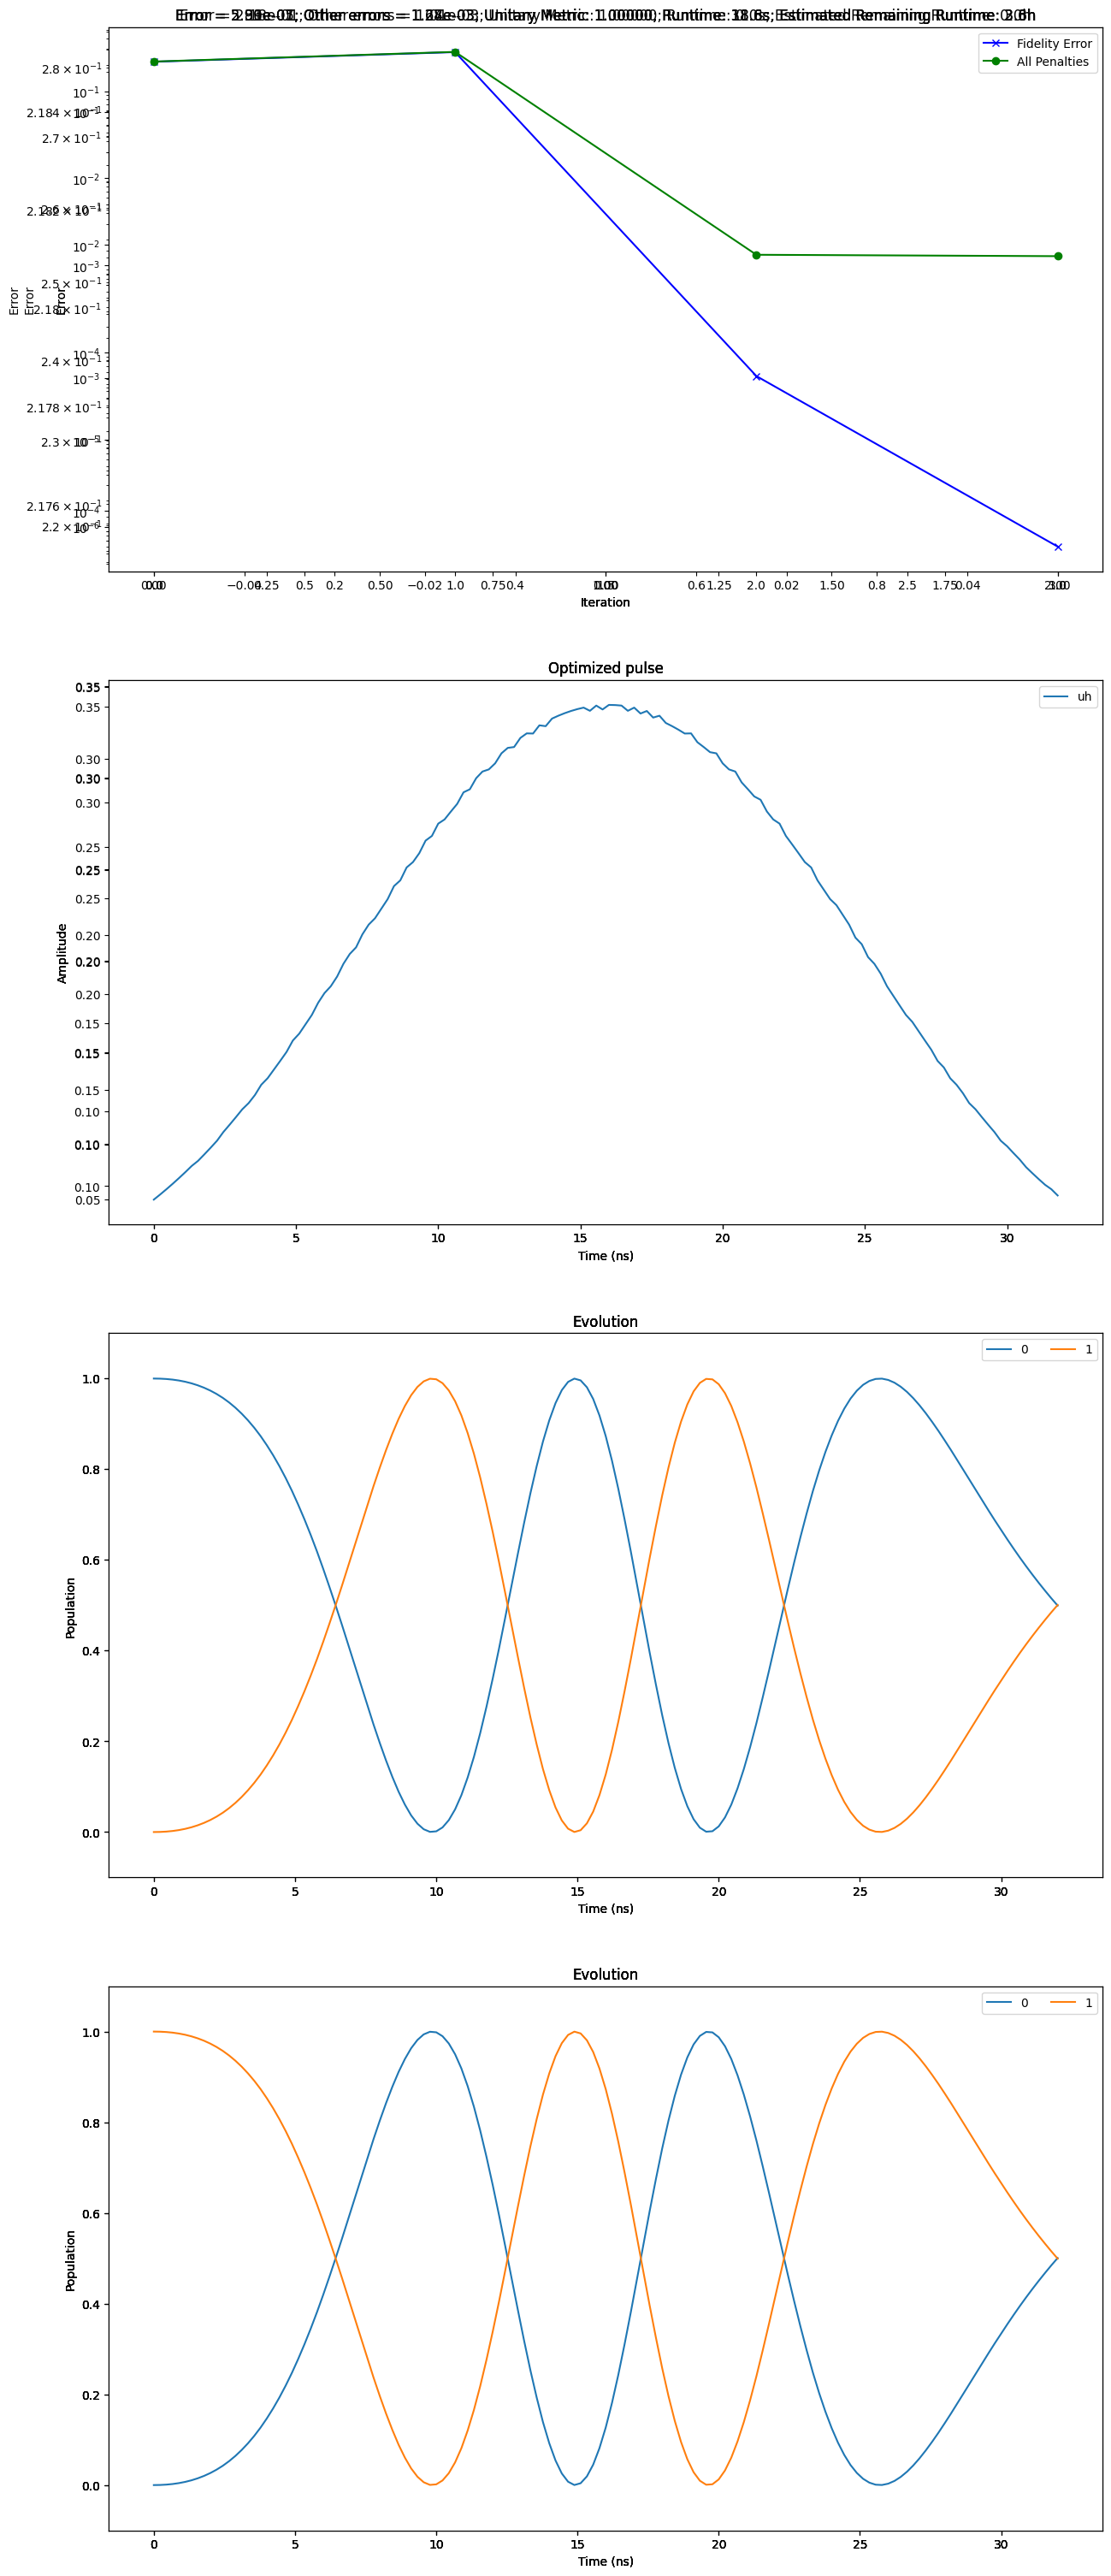

In [6]:
uks, U_final = Grape(H0, Hops, Hnames, U, total_time, steps, psi0,
                    convergence = convergence, 
                    draw = [states_draw_list, states_draw_names],
                    state_transfer = True,
                    use_gpu = False,
                    sparse_H = False,
                    show_plots = True, 
                    unitary_error = 1e-6, 
                    method = 'L-BFGS-B', 
                    maxA = ops_max_amp,
                    Taylor_terms = [20,0] ,
                    reg_coeffs = reg_coeffs,
                    save = True,
                    file_name = 'x01_90_lagos',
                    data_path = data_path)